20
[[ 1.   0.   0. ]
 [ 0.   1.   0. ]
 [-1.   0.   0. ]
 [ 0.  -1.   0. ]
 [ 1.   0.   0. ]
 [ 0.   1.   0. ]
 [-1.   0.   0. ]
 [ 0.  -1.   0. ]
 [ 0.   0.  10. ]
 [ 0.   0.  10. ]
 [ 0.   0.  10. ]
 [ 0.   0.  10. ]
 [ 0.5  0.5 30. ]
 [-0.5  0.5 30. ]
 [-0.5 -0.5 30. ]
 [ 0.5 -0.5 30. ]
 [ 1.   0.  10. ]
 [ 0.   1.  10. ]
 [-1.   0.  10. ]
 [ 0.  -1.  10. ]]
[[-1.         -0.         -0.          1.          0.          0.        ]
 [-0.         -1.         -0.          0.          1.          0.        ]
 [ 1.         -0.         -0.         -1.          0.          0.        ]
 [-0.          1.         -0.          0.         -1.          0.        ]
 [-1.         -0.         -0.          1.          0.          0.        ]
 [-0.         -1.         -0.          0.          1.          0.        ]
 [ 1.         -0.         -0.         -1.          0.          0.        ]
 [-0.          1.         -0.          0.         -1.          0.        ]
 [-0.         -0.         -1.       

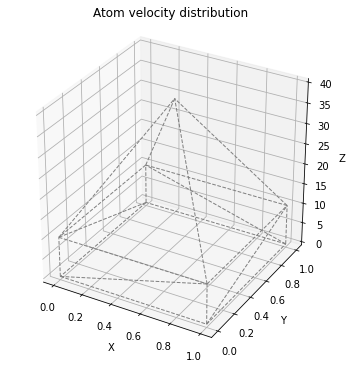

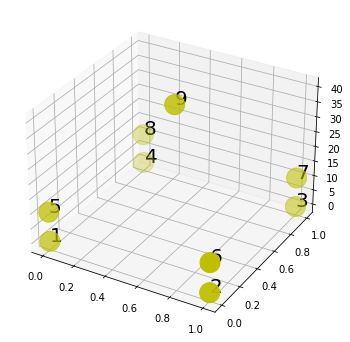

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits import mplot3d

E = 200e9
S = 10

nodes = []
bars =[]

### Nodes

h = 10
H = 40

nodes.append([0,0,0])
nodes.append([1,0,0])
nodes.append([1,1,0])
nodes.append([0,1,0])

nodes.append([0,0,h])
nodes.append([1,0,h])
nodes.append([1,1,h])
nodes.append([0,1,h])

nodes.append([0.5,0.5,H])

### Bars
#socle 1
bars.append([1,2])
bars.append([2,3])
bars.append([3,4])
bars.append([4,1])
#socle 2
bars.append([5,6])
bars.append([6,7])
bars.append([7,8])
bars.append([8,5])
#connection 1
bars.append([1,5])
bars.append([2,6])
bars.append([3,7])
bars.append([4,8])
#connection 2
bars.append([5,9])
bars.append([6,9])
bars.append([7,9])
bars.append([8,9])
#renforcement
bars.append([1,6])
bars.append([2,7])
bars.append([3,8])
bars.append([4,5])

nodes = np.array(nodes).astype(float)
bars = np.array(bars)

print(len(bars))

#Aplly force
P = np.zeros_like(nodes)
P[8,2] = 1000

# support displacement
U_r = [0,0,0,0,0,0,0,0,0,0,0,0]

DOFCON = np.ones_like(nodes).astype(int)
DOFCON[1,:] = 0
DOFCON[2,:] = 0
DOFCON[3,:] = 0
DOFCON[4,:] = 0

#plt.ion()
def plot(nodes,c,lt,lw,lg) : 
    fig = plt.figure(figsize=(8,6))
    #plt.gca(projection='3d')
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(bars)) :
        xi,xj = nodes[bars[i,0]-1,0],nodes[bars[i,1]-1,0]
        yi,yj = nodes[bars[i,0]-1,1],nodes[bars[i,1]-1,1]
        zi,zj = nodes[bars[i,0]-1,2],nodes[bars[i,1]-1,2]
        line, = ax.plot([xi,xj],[yi,yj],[zi,zj],color = c, lw = lw, linestyle = lt)
        line.set_label(lg)
        #plt.draw()
        #fig.canvas.draw()
        #plt.pause(0.1)
        #ax.cla()
        #fig.canvas.flush_events()
    ax.set_title("Atom velocity distribution")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_box_aspect([1,1,1])
        
plot(nodes,'gray','--',1,'undeformed')
#plt.show()
#plt.savefig("Customized Surface Plot.png")

def geom(NL) : 
    fig = plt.figure(figsize=(8,6))
    #plt.gca(projection='3d')
    ax = fig.add_subplot(111, projection='3d')
    x = [x for x in NL[:,0]]
    y = [y for y in NL[:,1]]
    z = [z for z in NL[:,2]]
    size = 400
    offset = size/4000.
    ax.scatter(x, y, z, c='y', s=size, zorder=1)
    for i, location in enumerate(zip(x,y)):
        #plt.annotate(i+1, (location[0]-offset, location[1]-offset), zorder=10)
        ax.text(x[i],y[i],z[i],str(i+1),size=20,zorder=2,color = "k")
geom(nodes)

def truss_analyse():
    NoN = len(nodes)
    NoE = len(bars)
    DOF = 3
    NDOF = DOF*NoN
    d = nodes[bars[:,1]-1,:] - nodes[bars[:,0]-1,:]
    print(d)
    L = np.sqrt((d**2).sum(axis=1))
    angle = d.T/L
    a = np.concatenate((-angle.T,angle.T),axis=1)
    print(a)
    K = np.zeros([NDOF,NDOF])
    for k in range(NoE) :
        aux = 2*bars[k,:]
        index = np.r_[aux[0]:aux[0]+2,aux[1]:aux[1]+2]
        
        ES = np.dot(a[k][np.newaxis].T*E*S,a[k][np.newaxis]/L[k])
        #K[]
    
    freeD0F = DOFCON.flatten().nonzero()[0]
    #supportDOF = 
                
truss_analyse()